In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matgen.base import CellComplex

In [ ]:
# Header: ^P::Cu-0.1Cr-0.1Zr ST+AT ECAP-C 20 C 1p-4 cleaned-NCIC::All data::Grain Size   9/20/2022
# 
# Column 1: Integer identifying grain
# Column 2-4: Average orientation (phi1, PHI, phi2) in degrees
# Column 5-7: Average orientation (phi1, PHI, phi2) in radians
# Column 8-9: Average Position (x, y) in microns
# Column 10: Edge grain (1) or interior grain (0)
# Column 11: Diameter of grain in microns

In [6]:
data1 = pd.read_csv('/Users/v94623eb2/Documents/ExpDataAnalysis/Experimental_Data/ECAP2022/Cu_01Cr_01Zr/raw_data_set/GF-Cu-0,1Cr-0,1Zr ECAP-Conform 1 pass.txt',
           skiprows=8, sep='\s+', names=['id', 'phi1_degree', 'PHI_degree', 'phi2_degree', 'phi1_rad', 'PHI_rad', 'phi2_rad', 'x', 'y', 'is_edge', 'D'])

In [7]:
data1.info()
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           992 non-null    int64  
 1   phi1_degree  992 non-null    float64
 2   PHI_degree   992 non-null    float64
 3   phi2_degree  992 non-null    float64
 4   phi1_rad     992 non-null    float64
 5   PHI_rad      992 non-null    float64
 6   phi2_rad     992 non-null    float64
 7   x            992 non-null    float64
 8   y            992 non-null    float64
 9   is_edge      992 non-null    int64  
 10  D            992 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 85.4 KB


,id,phi1_degree,PHI_degree,phi2_degree,phi1_rad,PHI_rad,phi2_rad,x,y,is_edge,D
0,1,6.944,46.965,351.34,0.12119,0.81970,6.13196,28.461,14.357,1,48.37
1,2,52.267,23.604,295.28,0.91223,0.41196,5.15361,1.628,0.203,1,1.13
2,3,193.599,42.040,191.87,3.37893,0.73374,3.34870,12.905,0.396,1,0.96
3,5,248.408,51.530,124.97,4.33553,0.89936,2.18116,101.028,93.695,1,183.77
4,6,26.442,45.930,347.80,0.46149,0.80163,6.07028,86.400,0.000,1,0.36


In [8]:
data1.D.describe()

count    992.000000
mean       1.792762
std       10.605383
min        0.300000
25%        0.300000
50%        0.470000
75%        0.660000
max      183.770000
Name: D, dtype: float64

<AxesSubplot:>

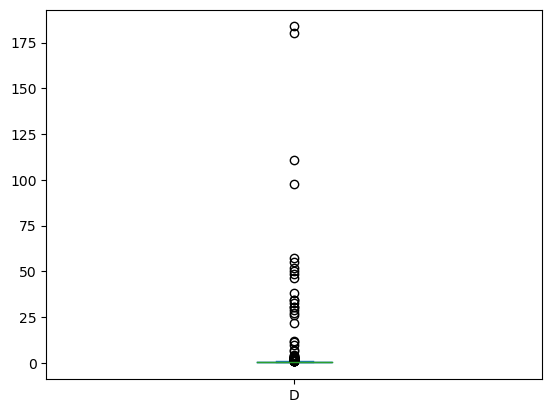

In [13]:
data1.D.plot(kind='box')

In [19]:
data1.x.describe()

count    992.000000
mean     133.523304
std       86.138826
min        0.033000
25%       57.448250
50%      124.553000
75%      208.936250
max      299.900000
Name: x, dtype: float64

In [20]:
data1.y.describe()

count    992.000000
mean     154.933476
std       85.112094
min        0.000000
25%       88.785250
50%      154.232500
75%      232.063500
max      299.905000
Name: y, dtype: float64

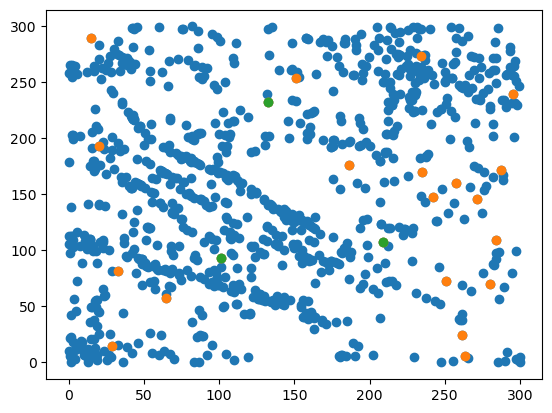

In [49]:
plt.scatter(data1.x, data1.y)
plt.scatter(bigdata1.x, bigdata1.y)
plt.scatter(biggestdata1.x, biggestdata1.y)

In [16]:
c1 = CellComplex.from_tess_file('/Users/v94623eb2/Documents/ExpDataAnalysis/Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass1/pass1.tess')

<AxesSubplot:>

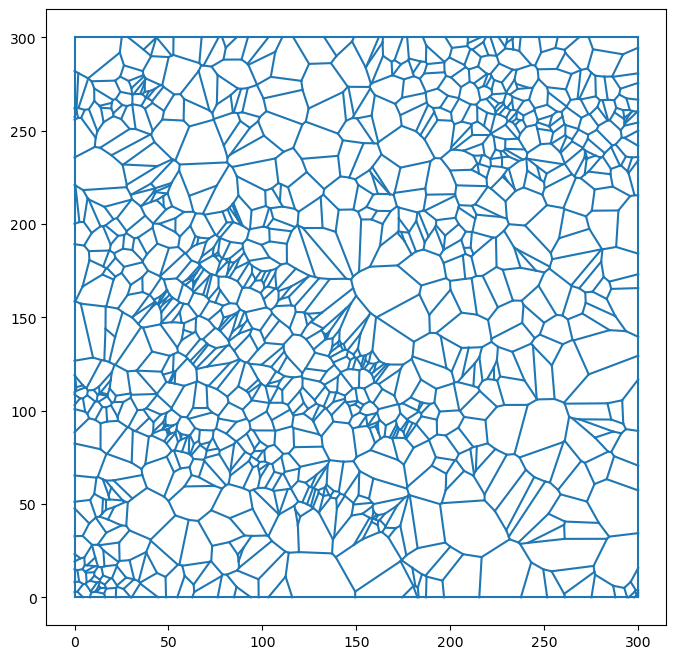

In [18]:
c1.plot_edges(color='C0')

In [8]:
import math
import numpy as np

In [9]:
areas_neper = np.loadtxt('/Users/v94623eb2/Documents/ExpDataAnalysis/Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass1/face_area.stface')

In [29]:
eq_diams = [math.sqrt(4 * area / math.pi) for area in areas]

In [31]:
pd.DataFrame(eq_diams).describe()

,0
count,992.000000
mean,9.467637
std,5.089759
min,0.599169
25%,5.649042
50%,8.673054
75%,12.077238
max,32.357945


In [32]:
data1[['D']].describe()

,D
count,992.000000
mean,1.792762
std,10.605383
min,0.300000
25%,0.300000
50%,0.470000
75%,0.660000
max,183.770000


(array([ 21.,  93., 165., 156., 160., 140.,  85.,  65.,  43.,  29.,  14.,
          7.,   4.,   4.,   4.,   1.]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]),
 <BarContainer object of 16 artists>)

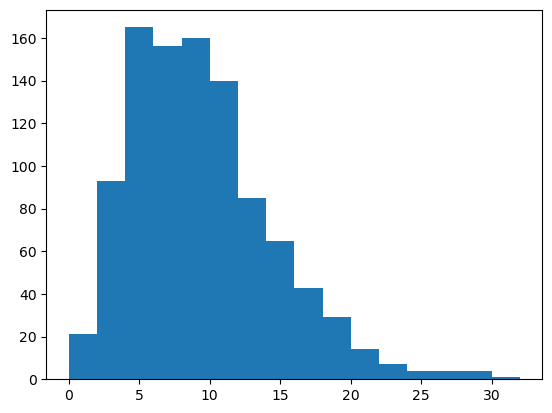

In [36]:
plt.hist(eq_diams, bins=np.arange(0,33,2))

(array([951.,  14.,   2.,   2.,   1.,   1.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   2.,   1.,   2.]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]),
 <BarContainer object of 16 artists>)

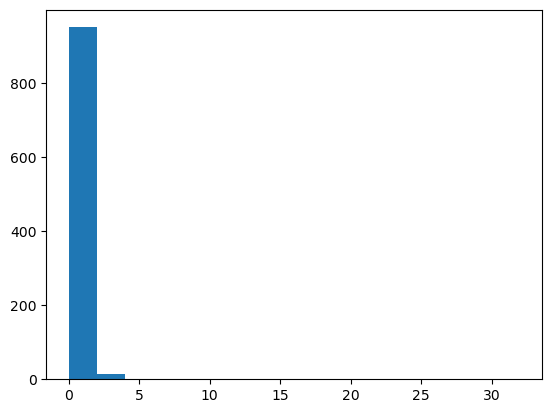

In [37]:
plt.hist(data1['D'], bins=np.arange(0,33,2))

In [38]:
sum(areas)

89999.99999999997

In [39]:
sum(math.pi * data1.D.values * data1.D.values / 4)

90046.02431182608

In [44]:
bigdata1 = data1[data1.D > 10]

In [48]:
biggestdata1.count()

id             3
phi1_degree    3
PHI_degree     3
phi2_degree    3
phi1_rad       3
PHI_rad        3
phi2_rad       3
x              3
y              3
is_edge        3
D              3
dtype: int64

In [47]:
biggestdata1 = data1[data1.D > 100]

# Test functions

In [10]:
c = CellComplex.from_tess_file('examples/pass1.tess')

In [11]:
c

<class CellComplex> 2D
1986 vertices
2977 edges
992 faces

In [28]:
areas = [round(face.area,8) for face in c._faces.values()]
lens = [round(edge.length,8) for edge in c._edges.values()]

In [21]:
len(areas)

992

In [22]:
len(lens)

2977

In [29]:
areas[:10]

[57.65207505,
 8.89500439,
 19.14701803,
 92.32342798,
 25.02556356,
 173.22276588,
 174.86099492,
 103.36229308,
 1.29032029,
 51.6231199]

In [24]:
lens[:10]

[10.55177233945853,
 0.08010325325385241,
 4.33444760600871,
 7.835182623716741,
 0.67399353260125,
 1.826528249735003,
 0.8476322601578334,
 5.346354505155673,
 2.751774260838,
 4.481827883909]

In [19]:
c.set_measures_from_coo()

In [25]:
areas_neper = np.loadtxt('/Users/v94623eb2/Documents/ExpDataAnalysis/Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass1/face_area.stface')

In [35]:
lens_neper = np.loadtxt('/Users/v94623eb2/Documents/ExpDataAnalysis/Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass1/edge_length.stedge')

In [26]:
len(areas_neper)

992

In [36]:
len(lens_neper)

2977

In [27]:
areas_neper[:10]

array([ 57.65207505,   8.89500439,  19.14701803,  92.32342798,
        25.02556356, 173.22276588, 174.86099492, 103.36229308,
         1.29032029,  51.6231199 ])

In [37]:
lens_neper[:10]

array([10.55177234,  0.08010325,  4.33444761,  7.83518262,  0.67399353,
        1.82652825,  0.84763226,  5.34635451,  2.75177426,  4.48182788])

In [32]:
areas[:10]

array([ 57.65207505,   8.89500439,  19.14701803,  92.32342798,
        25.02556356, 173.22276588, 174.86099492, 103.36229308,
         1.29032029,  51.6231199 ])

In [38]:
lens[:10]

[10.55177234,
 0.08010325,
 4.33444761,
 7.83518262,
 0.67399353,
 1.82652825,
 0.84763226,
 5.34635451,
 2.75177426,
 4.48182788]

In [30]:
areas = np.array(areas)

In [39]:
lens = np.array(lens)

In [34]:
(areas - areas_neper).min()

-4.994999969198943e-09

In [42]:
(lens - lens_neper).min()

-4.994000102342966e-09

In [47]:
c.set_theta_from_ori(lower_thrd=15)

In [48]:
special_ids = c.get_special_ids()

In [49]:
len(special_ids)

2185

(array([268., 352., 298., 248., 199., 239., 296., 303., 378., 396.]),
 array([-1.        ,  5.31439443, 11.62878886, 17.94318329, 24.25757772,
        30.57197215, 36.88636658, 43.20076101, 49.51515543, 55.82954986,
        62.14394429]),
 <BarContainer object of 10 artists>)

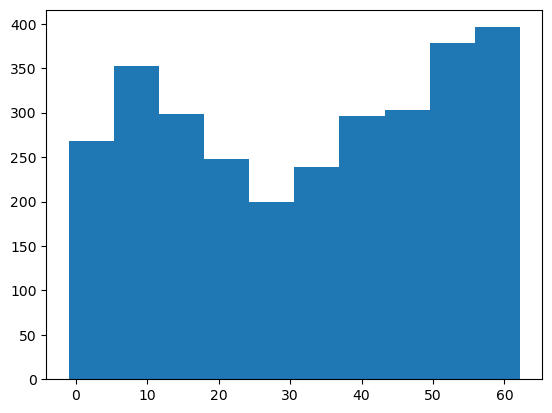

In [50]:
plt.hist([edge.theta for edge in c.edges])

In [56]:
pd.DataFrame([(1,2), (3, 4), (5,6)], columns=['x', 'y']).to_dict('list')

{'x': [1, 3, 5], 'y': [2, 4, 6]}

In [55]:
dict(x=[1,3,5], y=[2,4,6])

{'x': [1, 3, 5], 'y': [2, 4, 6]}